# 1. ANN 과제

## Backpropagation의 가중치 업데이트

다음은 17페이지에 제시된 **역전파(Backpropagation) 과정 중 가중치 업데이트 단계**를 나타낸 식이다.

가중치 업데이트 단계는 앞선 단계에서 계산된 오차의 기울기를 이용해  
손실 함수(Error)를 최소화하는 방향으로 가중치를 조정하는 과정이며,  
이때 사용되는 규칙은 대표적인 **최적화 기법**에 해당한다.  


$$
W^{(l)} \leftarrow W^{(l)} - \alpha \frac{\partial E}{\partial W^{(l)}}
$$


##  문제

1. 위 가중치 업데이트 식이 의미하는 **최적화 기법**이 무엇인지 설명하시오.  
2. 위 식에서  
$$
\frac{\partial E}{\partial W^{(l)}}
$$
   가 어떻게 계산되는지를 **Chain Rule(연쇄법칙)** 을 이용해 설명하시오.  

   (Hint: 세션 자료 하단에 제시된 최종 결과식을 참고헤 도출 과정 서술하면 됨)



### 답변 1 :
위 가중치 업데이트 식에서 의미하는 최적화 기법은 경사하강법(Gradient Descent)이다. 현재 가중치 𝑊(𝑙)에서 오차*E*가 가장 가파르게 증가하는 방향으로 이동하여 새로운 가중치로 업데이트한다. 이때 *a*는 그 방향으로 얼마나 이동할지 결정하는 학습률(learning rate)이다.

### 답변 2 :
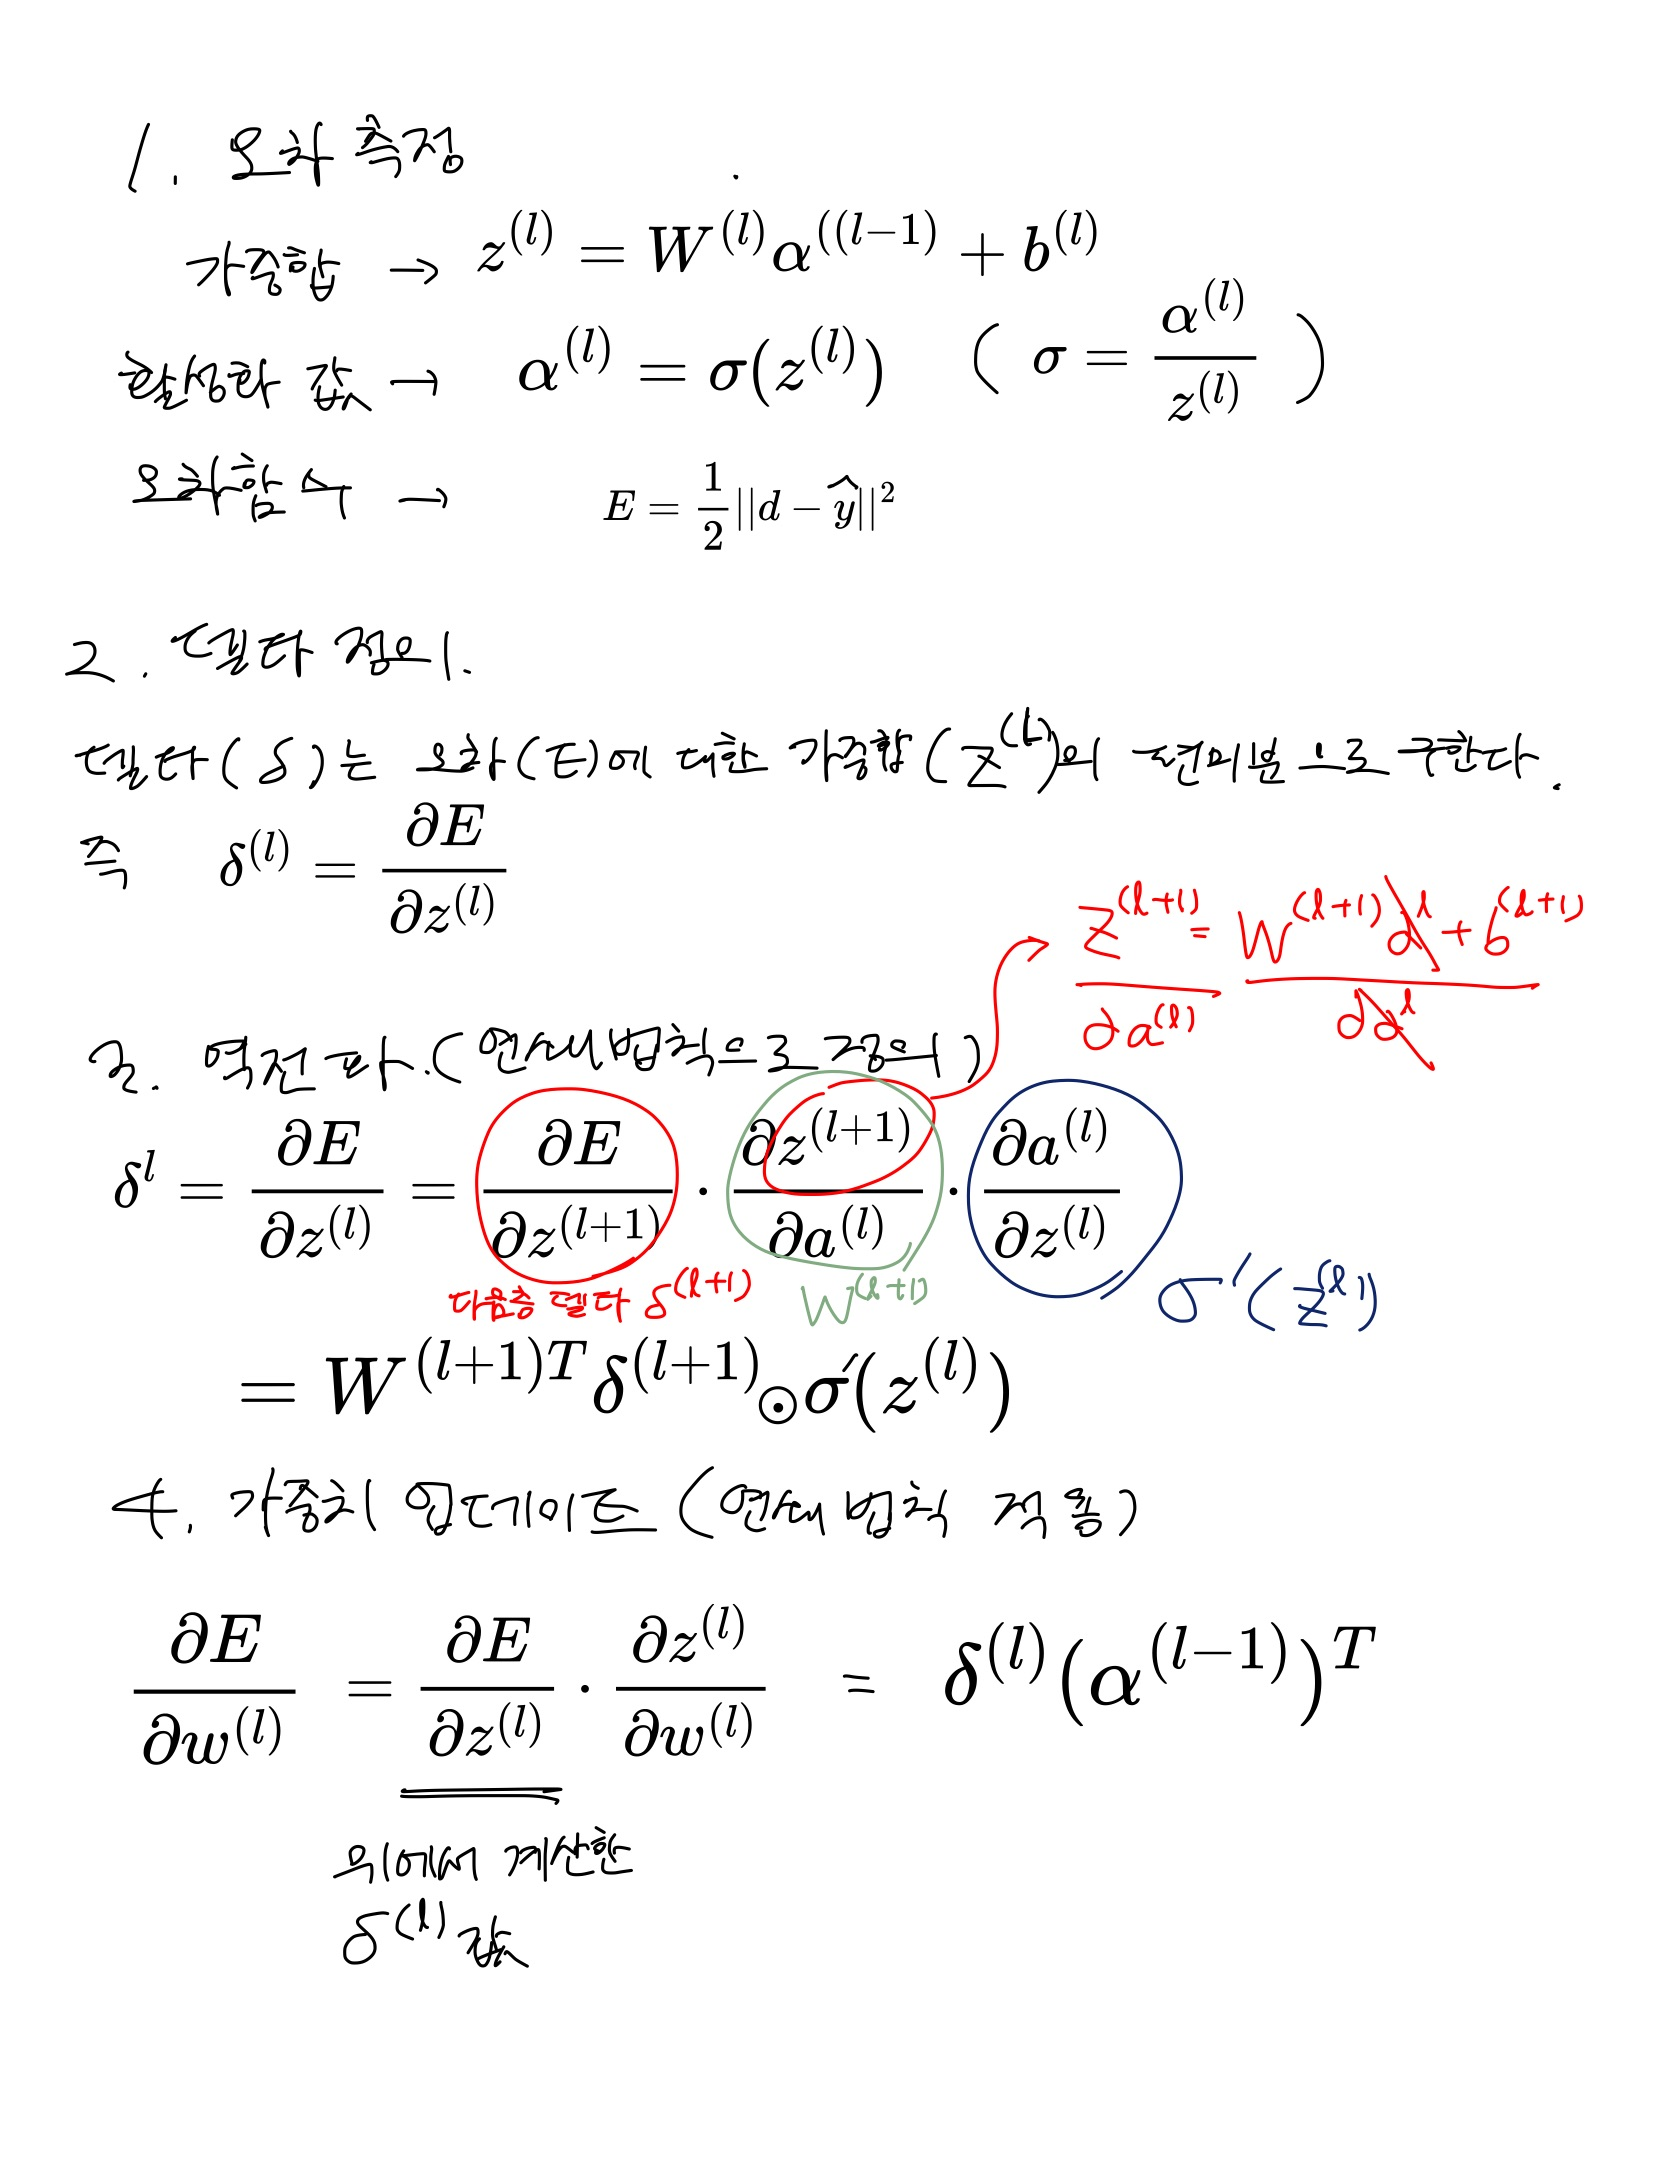


---

# 2. DNN 과제

다음은 세션 자료 25p의 과제의 내용이다. 자료에 주어진 조건을 바탕으로 아래 문제들을 해결하시오.

---

### **1. 파라미터 수 직접 계산하기**
주어진 신경망 구조(784 - 16 - 16 - 10)를 기준으로 총 학습 파라미터 수(가중치 $W$ 및 편향 $b$)를 직접 계산하시오.



### 답변 :
(784-16-16-10) 구조에서 파라미터 수는
1. 784 -> 16 : $$784 \times 16 + 1 \times16 = 12560$$
2. 16 -> 16 : $$16 \times16 + 1\times16 = 272$$
3. 16 -> 10 : $$16\times 10 + 1\times 10 = 160$$

따라서 총 13002개이다.

---

### **2. TensorFlow 모델 구현 및 검증**
동일한 구조의 DNN을 TensorFlow/Keras 코드로 구현하고, `model.summary()` 출력 결과와 위에서 계산한 값이 일치하는지 확인하시오. (학습 과정은 필요 X)

In [ ]:
## 1. 적절한 라이브러리를 import하세요
from keras.models import Sequential
from keras.layers import Dense

## 2. 모델 설계하기
model = models.Sequential([
    #입력
    Dense(units = 16, activation = 'relu', input_dim = 784),
    #입력 -> 은닉1
    Dense(units = 16, activation = 'relu'),
    #은닉1 -> 은닉2
    Dense(units = 10, activation = 'softmax')
])

## 3. 모델 summary 출력
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

---

### **3. 결과 비교**
1번에서 직접 계산한 학습 파라미터 수와 model.summary() 출력 결과의 Total params 값이
서로 일치하는지 확인하시오.

### 답변 :
값이 13002개로 일치한다.

# 3. CNN 과제

---
## **Introduction**

![](https://miro.medium.com/v2/resize:fit:3744/format:webp/1*SGPGG7oeSvVlV5sOSQ2iZw.png)
([Image Credit](https://medium.com/data-science/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9))

Pytorch를 사용하여 이미지와 같이 MNIST 데이터셋을 분류하는 CNN 모델을 구현해봅시다.   
Pytorch가 익숙하지 않은 분들은 [다음 튜토리얼](https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)을 참고해주세요.


---
## **1. Import Libraries & Data**

In [6]:
# 필요한 라이브러리를 불러옵니다.
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

In [7]:
# 이미지 변환 함수를 정의합니다.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) ## 1. 이미지에 Normalize를 하는 이유와 2. 다음과 같은 숫자를 사용한 이유는 무엇일까요? (답은 작성하지 않으셔도 됩니다.)
])
#이미지에 정규화 하는 이유 - 학습 속도 향상, 학습 안정화(데이터의 고른 분포 유도)
#0.1307, 0.3081 - mnist 데이터셋의 mean값과 std값 제시로 정규화 시 표준 정규 분포에 가까워져 효율적인 학습 가능

# 데이터셋을 불러오고, DataLoader를 사용하여 데이터를 로드합니다.
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 4.96MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.66MB/s]


In [8]:
## 데이터셋의 크기와 차원을 확인합니다.
print(f'training set size: {len(trainset)}')
print(f'test set size: {len(testset)}\n')

print(f'training set dimension: {trainset.data.shape}')
print(f'test set dimension: {testset.data.shape}')

training set size: 60000
test set size: 10000

training set dimension: torch.Size([60000, 28, 28])
test set dimension: torch.Size([10000, 28, 28])


---
## **2. Define a Convolutional Neural Network**

주어진 모델을 다시 한 번 정리해봅시다.


**Conv_1** : 3x3 filter 32개, stride: 1, padding: 1, activation = 'relu'   
**Pool_2** : 2x2 filter, stride: 2, padding: 0  
**Conv_3** : 3x3 filter 64개, stride: 1, padding: 1, activation = 'relu'   
**Pool_4** : 2x2 filter, stride: 2, padding: 0   
**Dense_5** : 128, activation = 'relu'   
**Dense_6** : 10, activation = 'softmax'

In [9]:
# 아래 코드의 빈칸을 채워주세요!
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1)
        self.pool4 = nn.MaxPool2d(2,2)
        self.dense5 = nn.Linear(64 * 7 * 7, 128)
        self.dense6 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool4(x)
        x = torch.flatten(x, 1) # flatten layer: 2D -> 1D
        x = F.relu(self.dense5(x))
        x = self.dense6(x) #softmax는 학습 시 손실함수에 포함되므로 값만 출력
        return x

cnn = CNN()
print(cnn)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dense5): Linear(in_features=3136, out_features=128, bias=True)
  (dense6): Linear(in_features=128, out_features=10, bias=True)
)


In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.dense5 = nn.Linear(64 * 7 * 7, 128)
        self.dense6 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool4(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.dense5(x))
        x = self.dense6(x)
        return x

cnn = CNN()
print(cnn)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dense5): Linear(in_features=3136, out_features=128, bias=True)
  (dense6): Linear(in_features=128, out_features=10, bias=True)
)


#### **문제: 주어진 모델에 대해, layer마다 필요한 parameter의 수를 계산하세요.**

- Conv_1: (3x3x1+1)x32 = 320개
- Pool_2: 0개
- Conv_3: (3x3x32+1)x64 = 18,496개
- Pool_4: 0개
- FC_5: (64x7x7x128)+128 = 401,536개
- FC_6: (128x10)+128 = 1,290개

총 421,642개

In [11]:
# summary를 사용하여 정답과 계산 결과가 일치하는지 확인하세요.
# !pip install torchsummary

from torchsummary import summary

summary(cnn, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Linear-5                  [-1, 128]         401,536
            Linear-6                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.36
Params size (MB): 1.61
Estimated Total Size (MB): 1.97
----------------------------------------------------------------


---
## **3. Train a model**

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

In [13]:
for epoch in range(3):

    running_loss = 0
    acc = 0

    # training loop
    cnn.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data

        # parameter gradient 초기화
        optimizer.zero_grad()

        outputs = cnn(inputs) # 모델을 통해 output 계산
        loss = criterion(outputs, labels) # loss 계산
        loss.backward() # gradient 계산 (backpropagation)
        optimizer.step() # parameter 업데이트

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[Epoch: {epoch + 1}, {i + 1:3d}] loss: {running_loss / 100:.3f}')
            running_loss = 0

    # testing loop
    cnn.eval()
    for i, data in enumerate(testloader):
        inputs, labels = data
        outputs = cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        acc += (predicted == labels).sum().item()
    acc = acc / len(testloader.dataset)
    print(f"====== Epoch {epoch + 1} Finished, Accuracy: {acc*100:.2f}% ======")

print(f"\nTraining finished. Final accuracy: {acc*100:.2f}%")


[Epoch: 1, 100] loss: 0.492
[Epoch: 1, 200] loss: 0.156
[Epoch: 1, 300] loss: 0.116
[Epoch: 1, 400] loss: 0.096
[Epoch: 1, 500] loss: 0.079
[Epoch: 1, 600] loss: 0.065
[Epoch: 1, 700] loss: 0.066
[Epoch: 1, 800] loss: 0.064
[Epoch: 1, 900] loss: 0.056
====== Epoch 1 Finished, Accuracy: 98.23% ======
[Epoch: 2, 100] loss: 0.055
[Epoch: 2, 200] loss: 0.036
[Epoch: 2, 300] loss: 0.042
[Epoch: 2, 400] loss: 0.042
[Epoch: 2, 500] loss: 0.045
[Epoch: 2, 600] loss: 0.047
[Epoch: 2, 700] loss: 0.033
[Epoch: 2, 800] loss: 0.039
[Epoch: 2, 900] loss: 0.042
====== Epoch 2 Finished, Accuracy: 98.70% ======
[Epoch: 3, 100] loss: 0.026
[Epoch: 3, 200] loss: 0.022
[Epoch: 3, 300] loss: 0.023
[Epoch: 3, 400] loss: 0.025
[Epoch: 3, 500] loss: 0.024
[Epoch: 3, 600] loss: 0.033
[Epoch: 3, 700] loss: 0.029
[Epoch: 3, 800] loss: 0.042
[Epoch: 3, 900] loss: 0.022
====== Epoch 3 Finished, Accuracy: 98.81% ======

Training finished. Final accuracy: 98.81%


---
## **4. Experiment with the model**

In [14]:
# 기존의 모델을 원하는 대로 수정해보세요!
# ex) layer 추가, kernel size 변경, optimizer 변경, activation 함수 변경, Dropout, etc.
class newCNN(nn.Module):
    def __init__(self):
        super(newCNN, self).__init__()
        self.dropout = nn.Dropout(0.5)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1,padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, stride= 1, padding=1 )
        self.dense6 = nn.Linear(128 * 7 * 7, 128)
        self.dense7 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool4(x)
        x = F.relu(self.conv5(x))
        x = torch.flatten(x, 1) # flatten layer: 2D -> 1D
        x = F.sigmoid(self.dense6(x))
        x = self.dropout(x)
        x = self.dense7(x)
        return x

new_cnn = newCNN()
print(new_cnn)

newCNN(
  (dropout): Dropout(p=0.5, inplace=False)
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dense6): Linear(in_features=6272, out_features=128, bias=True)
  (dense7): Linear(in_features=128, out_features=10, bias=True)
)


In [21]:
from torchsummary import summary
summary(newCNN(), (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
            Linear-6                  [-1, 128]         802,944
           Dropout-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
Total params: 896,906
Trainable params: 896,906
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.41
Params size (MB): 3.42
Estimated Total Size (MB): 3.83
----------------------------------------------------------------


In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(new_cnn.parameters(), lr=0.001)

In [16]:
for epoch in range(3):

    running_loss = 0
    acc = 0

    # training loop
    new_cnn.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data

        # parameter gradient 초기화
        optimizer.zero_grad()

        outputs = new_cnn(inputs) # 모델을 통해 output 계산
        loss = criterion(outputs, labels) # loss 계산
        loss.backward() # gradient 계산 (backpropagation)
        optimizer.step() # parameter 업데이트

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[Epoch: {epoch + 1}, {i + 1:3d}] loss: {running_loss / 100:.3f}')
            running_loss = 0

    # testing loop
    new_cnn.eval()
    for i, data in enumerate(testloader):
        inputs, labels = data
        outputs = new_cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        acc += (predicted == labels).sum().item()
    acc = acc / len(testloader.dataset)
    print(f"====== Epoch {epoch + 1} Finished, Accuracy: {acc*100:.2f}% ======")

print(f"\nTraining finished. Final accuracy: {acc*100:.2f}%")


[Epoch: 1, 100] loss: 0.901
[Epoch: 1, 200] loss: 0.258
[Epoch: 1, 300] loss: 0.171
[Epoch: 1, 400] loss: 0.128
[Epoch: 1, 500] loss: 0.109
[Epoch: 1, 600] loss: 0.098
[Epoch: 1, 700] loss: 0.098
[Epoch: 1, 800] loss: 0.091
[Epoch: 1, 900] loss: 0.078
====== Epoch 1 Finished, Accuracy: 98.70% ======
[Epoch: 2, 100] loss: 0.064
[Epoch: 2, 200] loss: 0.061
[Epoch: 2, 300] loss: 0.060
[Epoch: 2, 400] loss: 0.055
[Epoch: 2, 500] loss: 0.043
[Epoch: 2, 600] loss: 0.051
[Epoch: 2, 700] loss: 0.053
[Epoch: 2, 800] loss: 0.059
[Epoch: 2, 900] loss: 0.047
====== Epoch 2 Finished, Accuracy: 99.12% ======
[Epoch: 3, 100] loss: 0.038
[Epoch: 3, 200] loss: 0.039
[Epoch: 3, 300] loss: 0.034
[Epoch: 3, 400] loss: 0.037
[Epoch: 3, 500] loss: 0.043
[Epoch: 3, 600] loss: 0.031
[Epoch: 3, 700] loss: 0.042
[Epoch: 3, 800] loss: 0.038
[Epoch: 3, 900] loss: 0.039
====== Epoch 3 Finished, Accuracy: 99.07% ======

Training finished. Final accuracy: 99.07%


### **기존의 모델에서 어떤 부분을 수정하였는지 설명해주세요.**

답변 :
1. 합성곱 층 추가
- self.conv5 레이어를 새롭게 추가하여 Conv(128)층을 하나 더 쌓아 모델의 깊이를 늘렸다.
2. 활성화함수 변화
- 기존의 relu함수만 활용하던 부분에서 마지막에 sigmoid함수로 변경하였다.
3. 드롭아웃 추가
- 모델의 깊이가 깊어짐에 따라 과적합을 방지하기 위해 0.5만큼 드롭아웃을 추가하였다.

### **이러한 변경 사항이 결과에 어떻게 영향을 미쳤나요?**

답변 :
기존모델보다 합성곱 층과 채널 수가 증가하여 데이터 개수와 파라미터 수도 896,906개로 약 2배가량 증가했다. 과적합 발생을 막기 위해 드롭아웃을 적용한 것이 최종 정확도 98.81%에서 99.07%로 개선되었다.  
sigmoid함수는 모델이 깊어질수록 역전파 과정에서 기울기 소실 문제가 발생할 수 있어 relu함수를 쓰는 것이 더 안정적으로 보인다.

---
## **5. (정말 마지막) 이론 문제**
convolution이 무엇인지, 그리고 이를 이용하면 이미지의 feature를 추출할 수 있음을 이해하기 위한 문제입니다.

다음과 같은 input과 kernel이 존재할 때, 발표 자료의 방식과 같이 feature map을 구하고, 그 결과를 ?에 적으시오.
![](https://i.imgur.com/v1wkvhW.png)

정답:  
좌상단

Input: $\begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix}$
Kernel: $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

$$(0\times1) + (0\times0) + (0\times0) + (1\times1) = 1$$

우상단

Input: $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$
Kernel: $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$
$$(0\times1) + (1\times0) + (1\times0) + (0\times1) = 0$$

좌하단

Input: $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$
Kernel: $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$
$$(0\times1) + (1\times0) + (1\times0) + (0\times1) = 0$$

우하단

Input: $\begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}$
Kernel: $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$
$$(1\times1) + (0\times0) + (0\times0) + (0\times1) = 1$$

따라서

1 0   
0 1